Черкизовская - 2
Беляево - 0
Без метро - 10
Пятницкоешоссе - 13
ТеплыйСтан - 28
Соколинаягора - 0
Речнойвокзал - 0
Бунинскаяаллея - 19
Саларьево - 44
Алтуфьево - 10
Щелковская - 0
Митино - 1
Юго-Западная - 3
УлицаГорчакова - 5
Люблино - 5
Домодедовская - 0
Марьино - 1
Выхино - 1
Пражская - 0
БульварДмитрияДонского - 0
Царицыно - 0
Отрадное - 1


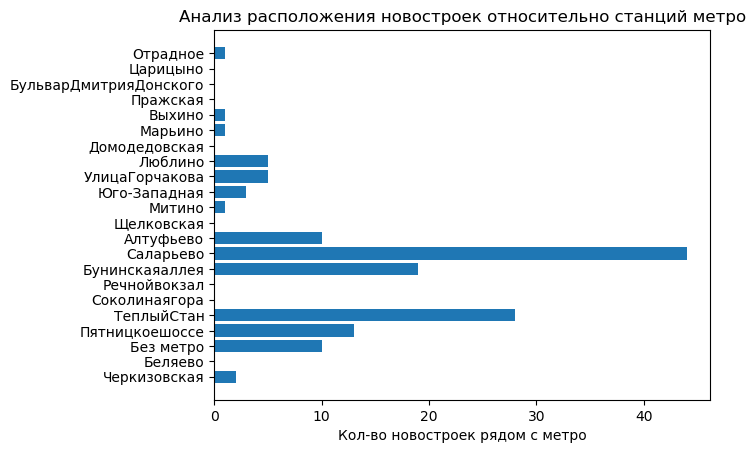

In [1]:
# ==================
# ДЗ №1: простые типы данных, изменяемые и неизменяемые типы, работа со строками, списки

# Задание: сделайте анализ выгрузки квартир с ЦИАН:

# 1) Измените структуру данных, используемую для хранения данных о квартире. Сейчас квартира = список. Сделайте вместо этого квартира = словарь следующего вида:
#flat_info = {"id":flat[0], "rooms":flat[1], "type":flat[2], "price":flat[11]}. В задании используйте поля: идентификатор квартиры на ЦИАН, количество комнат, тип (новостройка или вторичка), стоимость

# 2) Подсчитайте количество новостроек, расположенных у каждого из метро
%matplotlib inline
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

import csv

# читаем информацию о квартирах в список flats_list
flats_list = list()
with open('output.csv', encoding="utf-8") as csvfile:
    flats_csv = csv.reader(csvfile, delimiter=';')
    flats_list = list(flats_csv)

# убираем заголовок
header = flats_list.pop(0)

# создаем словарь с информацией о квартирах
subway_dict = {}
for flat in flats_list:
    #print(flat[3])
    subway = flat[3].replace("м.", "").strip()
    if subway == "" : 
        subway = "Без метро" 
    subway_dict.setdefault(subway, [])
    
# TODO 1: добавьте код, который генерирует новую структуру данных с информацией о квартире - словарь вместо списка
    # ваш код...
    # не забудьте сделать проверку типа и преобразовать то, что можно, в числа
    flat_info = {"id":flat[0], "rooms":flat[1], "type":flat[2], "price":flat[11]}
    #print(flat_info)
    try:
        flat_info.update({"rooms":int(flat_info["rooms"])})
        flat_info.update({"price":int(flat_info["price"])})
    except:
        flat_info.update({"rooms":int(flat_info["rooms"][0])})
    #print(flat_info)
    #print(f"{type(flat_info['id'])},   {type(flat_info['rooms'])},   {type(flat_info['type'])},  {type(flat_info['price'])}")
    

    subway_dict[subway].append(flat_info)

#print(subway_dict.keys())
# TODO 2: подсчитайте и выведите на печать количество новостроек, расположенных рядом с каждым из метро. Используйте вариант прохода по словарю, который вам больше нравится

#list(subway_dict)
#print(type(subway_dict))

Chart = dict()
for k,v in subway_dict.items():
    # print(v)
    col_novostroy = 0
    for v1 in v:
        if v1["type"] == "новостройка":
            #print(v1)
            col_novostroy += 1
            
    
    print(f"{k} - {col_novostroy}")
    Chart.update({k:col_novostroy})
    


plt.barh(range(len(Chart)), list(Chart.values()), align='center')
plt.yticks(range(len(Chart)), list(Chart.keys()))
plt.xlabel('Кол-во новостроек рядом с метро')
plt.title('Анализ расположения новостроек относительно станций метро')

plt.show()
    
